In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#set in the sys path the folder where the custom modules are. 
sys.path.insert(0, '/nas/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')

# 4 inch Time Lag Correlation Analysis at SCAN station 2078 with ALEXI

The Goal of this analysis is to see if there is a time component to the 4 inch soil moisture correlations with ALEXI ESI products. 

In [2]:
from class_driver import Driver
from datasets import SCAN_READ #daily soil moisture data for all scan sites
SCAN_READ

Date       station  SMN-2.0in  SMN-4.0in  SMN-8.0in  SMN-20.0in  \
0       4/24/02  2057:AL:SCAN       14.2       11.9       15.9         NaN   
1       4/25/02  2057:AL:SCAN       13.5       11.6       15.4         NaN   
2       4/26/02  2057:AL:SCAN       13.1       11.3       15.3        33.7   
3       4/27/02  2057:AL:SCAN       13.1       11.4       15.0         NaN   
4       4/28/02  2057:AL:SCAN       13.3       11.3       14.4         NaN   
...         ...           ...        ...        ...        ...         ...   
79218  10/12/19  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79219   3/28/20  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79220   5/31/20  2182:AL:SCAN        NaN        NaN        NaN         NaN   
79221   9/21/19  2176:AL:SCAN        NaN        NaN        NaN         NaN   
79222   1/14/09  2056:AL:SCAN        NaN        NaN        NaN         NaN   

       SMN-40.0in  SMS-2.0in  SMS-4.0in  SMS-8.0in  ...  STV-2.0in  STV-4.0in  \
0            34.9       14.7       12.7       16.6  ...     68.660     68.150   
1            34.8       14.5       11.8       16.0  ...     66.552     67.168   
2            34.6       13.5       11.6       15.4  ...     58.370     59.870   
3            34.5       13.2       11.5       15.5  ...     62.510     62.232   
4            34.4       13.5       11.5       15.0  ...     68.180     67.408   
...           ...        ...        ...        ...  ...        ...        ...   
79218         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79219         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79220         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79221         NaN        NaN        NaN        NaN  ...        NaN        NaN   
79222         NaN        NaN        NaN        NaN  ...        NaN        NaN   

       STV-8.0in  STV-20.0in  STV-40.0in  STX-2.0in  STX-4.0in  STX-8.0in  \
0         65.705      63.988      60.980      76.10      73.58      67.64   
1         66.102      64.302      61.032      70.88      70.16      67.46   
2         62.142      63.575      61.160      60.26      62.78      65.30   
3         61.025      62.008      61.018      69.80      67.64      63.32   
4         64.198      62.308      60.740      73.22      71.24      66.20   
...          ...         ...         ...        ...        ...        ...   
79218        NaN         NaN         NaN        NaN        NaN        NaN   
79219        NaN         NaN         NaN        NaN        NaN        NaN   
79220        NaN         NaN         NaN        NaN        NaN        NaN   
79221        NaN         NaN         NaN        NaN        NaN        NaN   
79222        NaN         NaN         NaN        NaN        NaN        NaN   

       STX-20.0in  STX-40.0in  
0           64.22       60.98  
1           64.40       61.16  
2           64.22       61.16  
3           62.60       61.16  
4           62.78       60.80  
...           ...         ...  
79218         NaN         NaN  
79219         NaN         NaN  
79220         NaN         NaN  
79221         NaN         NaN  
79222         NaN         NaN  

[79223 rows x 42 columns]

In the following code, I will generate a clean dataframe of 1 week soil moisture data for all SCAN sites. The code comes from a custom, object oriented, modular set of programs in the [SCAN-scripts](https://github.com/Corey4005/SCANAnalysis/tree/main/SCAN-scripts) folder which was designed to effeciently process SCAN data at scale. 

In [3]:
#instantiate a driver object with data
obj = Driver(SCAN_READ)

#calculate the soil moisture mean by month dataframe
obj.mean_soil_moisture_by_month()

#get the standard deviation by month dataframe
obj.standard_deviation_by_month()

#create a column for months in the stations dataframe
obj.get_month_from_dates()

#merge stdev, mean and stations dataframe together
obj.merge_station_stdev_mean()

#calculate the z_scores for each of the observations in the merged dataframe
obj.z_score()

#calculate the data quality based on z_score
obj.quality_z_score(std=3.5)

#clean the data and remove data that is outside the 3.5 standard deviation limit
obj.clean_data()

#resample the SMS data and return 1w and store in resample class
obj.soil_moisture_one_week_resample()

#append the soils to SMS dataframes
obj.create_1w_soil_columns()

#create a storage object for each offset dataframe
storage = {}

#create a list of offsets
days = list(range(-30,30))



Calculating Monthly Mean for 2057:AL:SCAN
Calculating Monthly Mean for 2078:AL:SCAN
Calculating Monthly Mean for 2177:AL:SCAN
Calculating Monthly Mean for 2113:AL:SCAN
Calculating Monthly Mean for 2174:AL:SCAN
Calculating Monthly Mean for 2055:AL:SCAN
Calculating Monthly Mean for 2173:AL:SCAN
Calculating Monthly Mean for 2180:AL:SCAN
Calculating Monthly Mean for 2114:AL:SCAN
Calculating Monthly Mean for 2178:AL:SCAN
Calculating Monthly Mean for 2181:AL:SCAN
Calculating Monthly Mean for 2182:AL:SCAN
Calculating Monthly Mean for 2176:AL:SCAN
Calculating Monthly Mean for 2056:AL:SCAN
Calculating Monthly Mean for 2179:AL:SCAN
Calculating Monthly Mean for 2115:AL:SCAN
Calculating Monthly Mean for 2175:AL:SCAN
Calculating Monthly Mean for 2053:AL:SCAN


Done!


Calculating Monthly Standard Deviation for 2057:AL:SCAN
Calculating Monthly Standard Deviation for 2078:AL:SCAN
Calculating Monthly Standard Deviation for 2177:AL:SCAN
Calculating Monthly Standard Deviation for 2113:AL:SCAN
Calculat

In [4]:
def get_signs(x):
    if x >= 0:
        return 0
    else:
        return 1 #means drought or negative score

In [5]:
#create dataframes where you offset soil moisture data from ALEXI 
for i in days: 
    print(i)
    obj.merge_1w_soil_resample_with_ALEXI(dayOffset=i)
    df = obj.merge1wALEXI
    df['ESI_sign'] = df['ESI'].apply(get_signs)
    df['2inANOM_sign'] = df['SMS-2.0in'].apply(get_signs)
    df['4inANOM_sign'] = df['SMS-4.0in'].apply(get_signs)
    df['8inANOM_sign'] = df['SMS-8.0in'].apply(get_signs)
    df['20inANOM_sign'] = df['SMS-20.0in'].apply(get_signs)
    df['40inANOM_sign'] = df['SMS-40.0in'].apply(get_signs)
    storage[i] = df #storing each new dataframe into the storage object (dictionary of dataframes)
    print('completed {}'.format(i))

-30
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -30 day offset
stored merge in self.merge1wALEXI object
completed -30
-29
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -29 day offset
stored merge in self.merge1wALEXI object
completed -29
-28
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -28 day offset
stored merge in self.merge1wALEXI object
completed -28
-27
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -27 day offset
stored merge in self.merge1wALEXI object
completed -27
-26
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -26 day offset
stored merge in self.merge1wALEXI object
completed -26
-25
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -25 day offset
stored merge in self.merge1wALEXI object
completed -25
-24
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -24 day offset
stored merge in self.merge1wALEXI object
completed -24
-23
merging 1

In [6]:
testHist = storage.get(0)

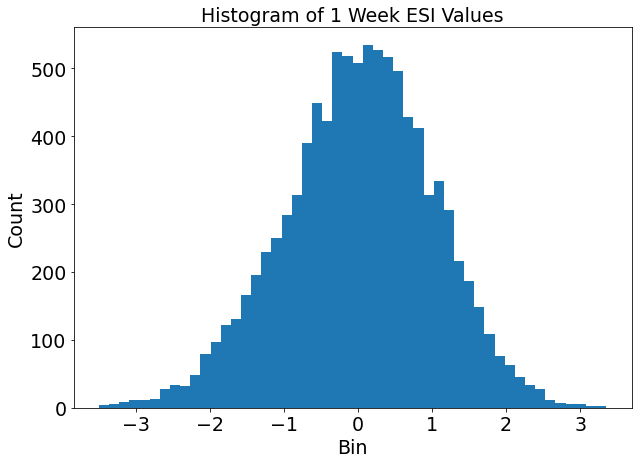

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(testHist['ESI'], bins=50)
ax.set_title('Histogram of 1 Week ESI Values', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
ax.set_xlabel('Bin', fontsize=19)
ax.xaxis.set_tick_params(labelsize=19)
ax.yaxis.set_tick_params(labelsize=19)

Now, we will go through the storage object, get a dataframe representing an offset, and create a dataframe of correlations with ALEXI. 

In [8]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            corrs.append(monthframe.corr()['ESI']['SMS-4.0in'])
            counts.append(monthframe.count()['SMS-4.0in'])
            


In [9]:
finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['months']=months #column for month
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
#we are going to do a similar study with accuracy with ALEXI. Here is a dataframe for that
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            y_pred = monthframe['ESI_sign']
            x_true2in = monthframe['2inANOM_sign']
            x_true4in = monthframe['4inANOM_sign']
            x_true8in = monthframe['8inANOM_sign']
            x_true20in = monthframe['20inANOM_sign']
            x_true40in = monthframe['40inANOM_sign']
            TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
            FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
            EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
            TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
            FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
            TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
            FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
            EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
            TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
            FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
            TwoListAccuracy.append(TwoAccuracy)
            FourListAccuracy.append(FourAccuracy)
            EightListAccuracy.append(EightAccuracy)
            TwentyListAccuracy.append(TwentyAccuracy)
            FortyListAccuracy.append(FortyAccuracy)
            

In [12]:
accuracyFrame = pd.DataFrame() #create empty dataframe
accuracyFrame['Daylag']=dayLag #column for daylag
accuracyFrame['station']=stations #column for station
accuracyFrame['months']=months #column for month
accuracyFrame['2inAccuracy']=TwoListAccuracy
accuracyFrame['4inAccuracy']=FourListAccuracy
accuracyFrame['8inAccuracy']=EightListAccuracy
accuracyFrame['20inAccuracy']=TwentyListAccuracy
accuracyFrame['40inAccuracy']=FortyListAccuracy

In [13]:
accuracyFrame

Daylag       station  months  2inAccuracy  4inAccuracy  8inAccuracy  \
0         -30  2053:AL:SCAN       3     0.454545     0.484848     0.439394   
1         -30  2053:AL:SCAN       4     0.471910     0.505618     0.483146   
2         -30  2053:AL:SCAN       5     0.525424     0.542373     0.491525   
3         -30  2053:AL:SCAN       6     0.619048     0.571429     0.595238   
4         -30  2053:AL:SCAN       7     0.571429     0.571429     0.571429   
...       ...           ...     ...          ...          ...          ...   
12955      29  2182:AL:SCAN      11     0.277778     0.305556     0.277778   
12956      29  2182:AL:SCAN      12     0.452381     0.404762     0.452381   
12957      29  2182:AL:SCAN       1     0.500000     0.568182     0.500000   
12958      29  2182:AL:SCAN       2     0.371429     0.457143     0.371429   
12959      29  2182:AL:SCAN       3     0.484848     0.484848     0.484848   

       20inAccuracy  40inAccuracy  
0          0.439394      0.454545  
1          0.449438      0.494382  
2          0.593220      0.508475  
3          0.547619      0.619048  
4          0.547619      0.523810  
...             ...           ...  
12955      0.361111      0.222222  
12956      0.476190      0.357143  
12957      0.500000      0.500000  
12958      0.371429      0.428571  
12959      0.484848      0.424242  

[12960 rows x 8 columns]

In [14]:
accuracyFrame[accuracyFrame['station']=='2053:AL:SCAN']

Daylag       station  months  2inAccuracy  4inAccuracy  8inAccuracy  \
0         -30  2053:AL:SCAN       3     0.454545     0.484848     0.439394   
1         -30  2053:AL:SCAN       4     0.471910     0.505618     0.483146   
2         -30  2053:AL:SCAN       5     0.525424     0.542373     0.491525   
3         -30  2053:AL:SCAN       6     0.619048     0.571429     0.595238   
4         -30  2053:AL:SCAN       7     0.571429     0.571429     0.571429   
...       ...           ...     ...          ...          ...          ...   
12751      29  2053:AL:SCAN       8     0.673913     0.717391     0.695652   
12752      29  2053:AL:SCAN       9     0.500000     0.484375     0.515625   
12753      29  2053:AL:SCAN      10     0.537500     0.500000     0.587500   
12754      29  2053:AL:SCAN      11     0.571429     0.500000     0.514286   
12755      29  2053:AL:SCAN      12     0.493151     0.506849     0.534247   

       20inAccuracy  40inAccuracy  
0          0.439394      0.454545  
1          0.449438      0.494382  
2          0.593220      0.508475  
3          0.547619      0.619048  
4          0.547619      0.523810  
...             ...           ...  
12751      0.673913      0.673913  
12752      0.531250      0.562500  
12753      0.512500      0.662500  
12754      0.471429      0.457143  
12755      0.479452      0.534247  

[720 rows x 8 columns]

In [15]:
accuracyFrame = accuracyFrame.set_index('Daylag')

In [16]:
month10 = accuracyFrame[accuracyFrame.index==10]

In [17]:
st2078 = accuracyFrame[accuracyFrame['station']=='2078:AL:SCAN']

In [18]:
month10 = st2078[st2078['months']==10]

Text(0.5, 1.0, '2078:AL:SCAN Month 10 ESI Prediction vs 4inANOM Truth')

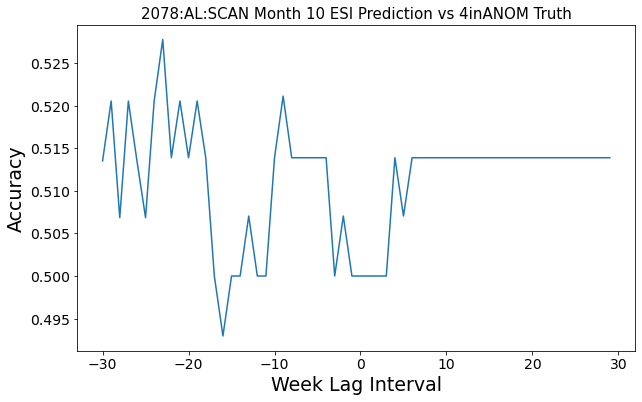

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Accuracy', fontsize=19)
ax.set_xlabel('Week Lag Interval', fontsize=19)
ax.plot(month10['4inAccuracy'], label='4inANOM')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('2078:AL:SCAN Month 10 ESI Prediction vs 4inANOM Truth', fontsize=15)

In [20]:
finalFrame

Daylag       station  months  count      corr
0         -30  2053:AL:SCAN       3     62 -0.152317
1         -30  2053:AL:SCAN       4     84  0.319145
2         -30  2053:AL:SCAN       5     56  0.213455
3         -30  2053:AL:SCAN       6     38  0.302644
4         -30  2053:AL:SCAN       7     36 -0.228401
...       ...           ...     ...    ...       ...
12955      29  2182:AL:SCAN      11     29  0.023983
12956      29  2182:AL:SCAN      12     33 -0.176767
12957      29  2182:AL:SCAN       1     36 -0.200511
12958      29  2182:AL:SCAN       2     28  0.167116
12959      29  2182:AL:SCAN       3     29  0.044010

[12960 rows x 5 columns]

Now we will just get month 10 at station 2078 and look at how correlations compare with daylag

In [21]:
df = finalFrame[finalFrame['station']=='2078:AL:SCAN']
month10 = df[df['months']==10]
month10

Daylag       station  months  count      corr
48        -30  2078:AL:SCAN      10     74  0.436096
265       -29  2078:AL:SCAN      10     73  0.463108
481       -28  2078:AL:SCAN      10     73  0.498136
697       -27  2078:AL:SCAN      10     73  0.499004
913       -26  2078:AL:SCAN      10     74  0.498110
1129      -25  2078:AL:SCAN      10     73  0.498552
1345      -24  2078:AL:SCAN      10     72  0.495048
1561      -23  2078:AL:SCAN      10     71  0.486228
1777      -22  2078:AL:SCAN      10     71  0.477459
1993      -21  2078:AL:SCAN      10     72  0.454533
2209      -20  2078:AL:SCAN      10     71  0.439925
2425      -19  2078:AL:SCAN      10     72  0.430434
2641      -18  2078:AL:SCAN      10     71  0.423610
2857      -17  2078:AL:SCAN      10     70  0.424362
3073      -16  2078:AL:SCAN      10     69  0.424265
3289      -15  2078:AL:SCAN      10     70  0.432446
3505      -14  2078:AL:SCAN      10     70  0.433836
3721      -13  2078:AL:SCAN      10     69  0.442704
3937      -12  2078:AL:SCAN      10     70  0.460865
4153      -11  2078:AL:SCAN      10     70  0.471289
4369      -10  2078:AL:SCAN      10     69  0.475680
4585       -9  2078:AL:SCAN      10     68  0.487418
4801       -8  2078:AL:SCAN      10     69  0.489126
5017       -7  2078:AL:SCAN      10     69  0.493337
5233       -6  2078:AL:SCAN      10     69  0.499240
5449       -5  2078:AL:SCAN      10     69  0.504003
5665       -4  2078:AL:SCAN      10     69  0.501586
5881       -3  2078:AL:SCAN      10     68  0.500001
6097       -2  2078:AL:SCAN      10     67  0.499343
6314       -1  2078:AL:SCAN      10     68  0.495068
6530        0  2078:AL:SCAN      10     68  0.490509
6746        1  2078:AL:SCAN      10     68  0.470713
6962        2  2078:AL:SCAN      10     68  0.455425
7178        3  2078:AL:SCAN      10     68  0.434239
7394        4  2078:AL:SCAN      10     67  0.420289
7610        5  2078:AL:SCAN      10     66  0.405747
7826        6  2078:AL:SCAN      10     67  0.390492
8042        7  2078:AL:SCAN      10     67  0.379008
8258        8  2078:AL:SCAN      10     67  0.380184
8474        9  2078:AL:SCAN      10     67  0.394107
8690       10  2078:AL:SCAN      10     67  0.401309
8906       11  2078:AL:SCAN      10     67  0.406739
9122       12  2078:AL:SCAN      10     67  0.416120
9338       13  2078:AL:SCAN      10     67  0.427121
9554       14  2078:AL:SCAN      10     67  0.429392
9770       15  2078:AL:SCAN      10     67  0.425152
9986       16  2078:AL:SCAN      10     67  0.410138
10202      17  2078:AL:SCAN      10     67  0.399986
10418      18  2078:AL:SCAN      10     67  0.390489
10634      19  2078:AL:SCAN      10     67  0.380598
10850      20  2078:AL:SCAN      10     67  0.364473
11066      21  2078:AL:SCAN      10     67  0.356946
11282      22  2078:AL:SCAN      10     67  0.357175
11498      23  2078:AL:SCAN      10     67  0.357501
11714      24  2078:AL:SCAN      10     67  0.350089
11930      25  2078:AL:SCAN      10     67  0.353811
12146      26  2078:AL:SCAN      10     67  0.356773
12363      27  2078:AL:SCAN      10     67  0.357328
12579      28  2078:AL:SCAN      10     67  0.353818
12795      29  2078:AL:SCAN      10     67  0.347977

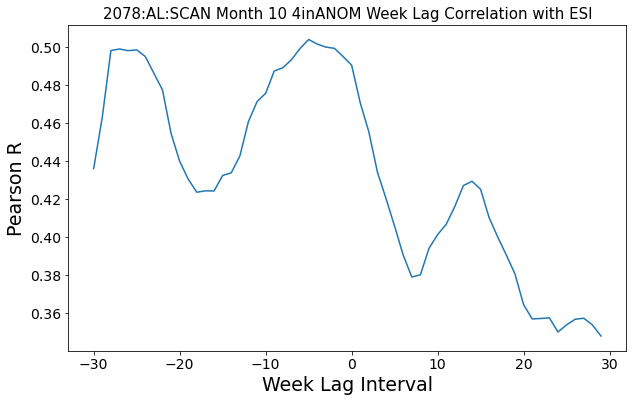

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.lineplot(x='Daylag', y='corr', data=month10)
g.set_title('{} Month 10 4inANOM Week Lag Correlation with ESI'.format(month10['station'].unique().item()), fontsize=15)
ax.set_ylabel('Pearson R', fontsize=19)
ax.set_xlabel('Week Lag Interval', fontsize=19)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

The graph shows that when soil moisture from SCAN at 2078 is offset from ALEXI at 5 days, you get a 8% increase in correlation from the standard, where they are lined up equally. 

Now, we will consider station 2078 correlations regardless of month. 

In [23]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        dayLag.append(i)
        stations.append(j)
        corrs.append(stationFrame.corr()['ESI']['SMS-4.0in'])
        counts.append(stationFrame.count()['SMS-4.0in'])

finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

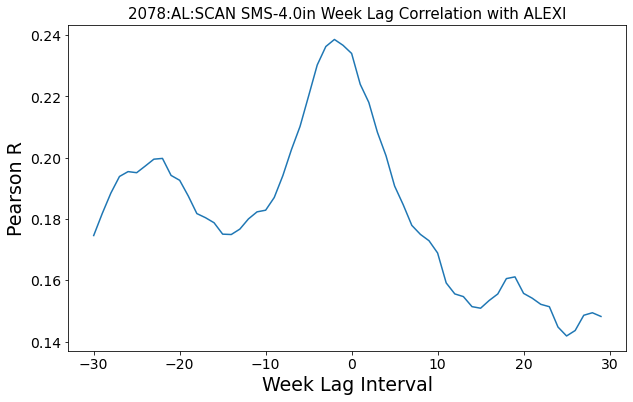

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
AL2078 = finalFrame[finalFrame['station']=='2078:AL:SCAN']
g = sns.lineplot(x='Daylag', y='corr', data=AL2078)
g.set_title('{} SMS-4.0in Week Lag Correlation with ALEXI'.format(AL2078['station'].unique().item()), fontsize=15)
ax.set_ylabel('Pearson R', fontsize=19)
ax.set_xlabel('Week Lag Interval', fontsize=19)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [25]:
AL2078[AL2078['Daylag']==0]

Daylag       station  count      corr
544       0  2078:AL:SCAN    680  0.234044

In [26]:
AL2078[AL2078['Daylag']==-4]

Daylag       station  count      corr
472      -4  2078:AL:SCAN    683  0.230282

In [27]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation
for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            corrs.append(monthframe.corr()['ESI']['SMS-4.0in'])
            counts.append(monthframe.count()['SMS-4.0in'])
            
finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['months']=months #column for month
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

In [28]:
AL2078 = finalFrame[finalFrame['station']=='2078:AL:SCAN']
AL2078

Daylag       station  months  count      corr
48        -30  2078:AL:SCAN      10     74  0.436096
49        -30  2078:AL:SCAN      11     59  0.408703
50        -30  2078:AL:SCAN      12     58  0.240704
51        -30  2078:AL:SCAN       1     69  0.157512
52        -30  2078:AL:SCAN       2     55  0.087252
...       ...           ...     ...    ...       ...
12799      29  2078:AL:SCAN       2     55  0.136517
12800      29  2078:AL:SCAN       3     60  0.182382
12801      29  2078:AL:SCAN       4     78  0.300302
12802      29  2078:AL:SCAN       5     55  0.054046
12803      29  2078:AL:SCAN       6     33 -0.075341

[720 rows x 5 columns]

In [29]:
five = AL2078[AL2078['Daylag']==-5]
zero = AL2078[AL2078['Daylag']==0]

<AxesSubplot:xlabel='months', ylabel='corr'>

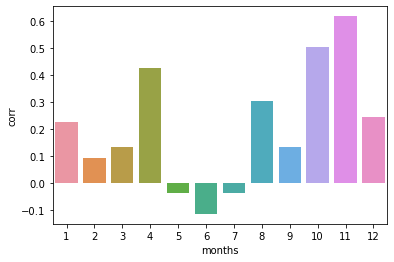

In [30]:
sns.barplot(x='months', y='corr', data=five)

<AxesSubplot:xlabel='months', ylabel='corr'>

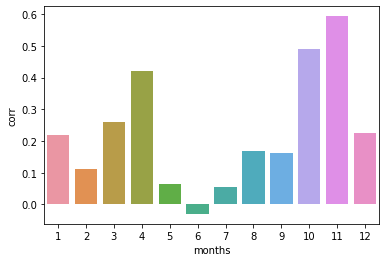

In [31]:
sns.barplot(x='months', y='corr', data=zero)

In [32]:
five.rename(columns={'corr':'-5corr'}, inplace=True)

In [33]:
zero.rename(columns={'corr':'0corr'}, inplace=True)

In [34]:
merge = zero.merge(five, on='months')
merge = merge[['station_x', 'months', '0corr', '-5corr']]

In [35]:
merge['difference']=merge['-5corr']-merge['0corr']

In [36]:
df = pd.melt(merge, id_vars="months", var_name="type", value_name="correlation")

In [37]:
df = df[12:]

In [38]:
df

months        type correlation
12       8       0corr     0.16803
13       9       0corr    0.162389
14      10       0corr    0.490509
15      11       0corr    0.593433
16      12       0corr    0.224909
17       1       0corr    0.217594
18       2       0corr    0.110315
19       3       0corr    0.259435
20       4       0corr    0.420577
21       5       0corr    0.063139
22       6       0corr   -0.029847
23       7       0corr    0.054321
24       8      -5corr     0.30539
25       9      -5corr    0.136713
26      10      -5corr    0.504003
27      11      -5corr    0.619474
28      12      -5corr    0.247881
29       1      -5corr    0.226293
30       2      -5corr    0.092607
31       3      -5corr    0.133401
32       4      -5corr    0.429216
33       5      -5corr   -0.036996
34       6      -5corr   -0.112951
35       7      -5corr   -0.037269
36       8  difference     0.13736
37       9  difference   -0.025676
38      10  difference    0.013495
39      11  difference    0.026041
40      12  difference    0.022972
41       1  difference    0.008699
42       2  difference   -0.017708
43       3  difference   -0.126035
44       4  difference    0.008638
45       5  difference   -0.100135
46       6  difference   -0.083104
47       7  difference   -0.091591

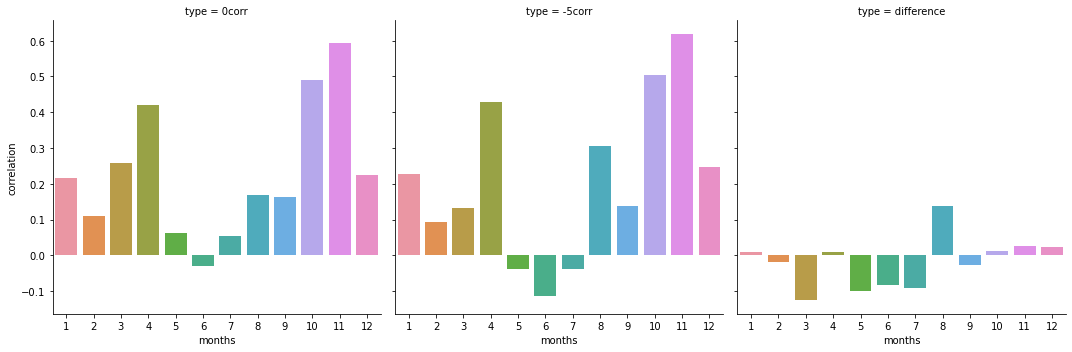

In [39]:
sns.factorplot("months", "correlation", col="type", data=df, kind="bar")

In [40]:
sns.set(font_scale=2)

Text(0.5, 0.98, 'Seasonal Daylag Correlations by Station')

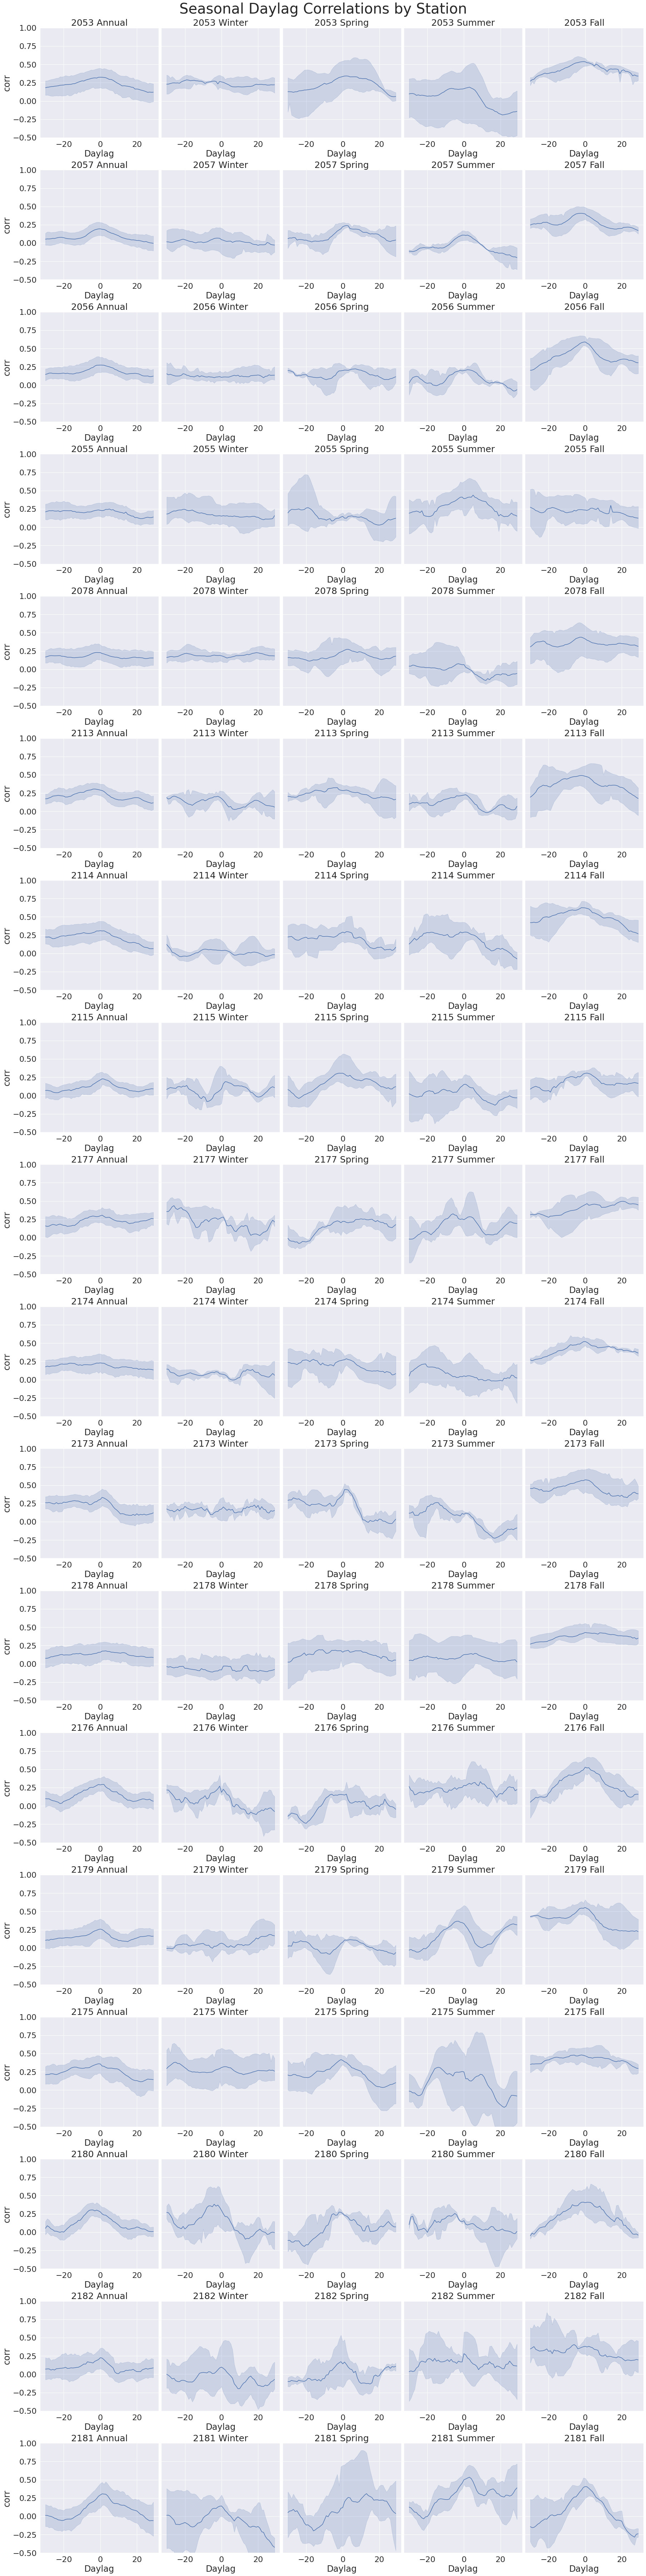

In [41]:
#plot station daylag correlations by season 
fig, axes = plt.subplots(18,5, figsize=(25, 100), constrained_layout=True, sharey=True)

for i, station in enumerate(finalFrame['station'].unique()):
    DJF = finalFrame[(finalFrame['months']==12)|(finalFrame['months']==1)|(finalFrame['months']==2)]
    MAM = finalFrame[(finalFrame['months']==3)|(finalFrame['months']==4)|(finalFrame['months']==5)]
    JJA = finalFrame[(finalFrame['months']==6)|(finalFrame['months']==7)|(finalFrame['months']==8)]
    SON = finalFrame[(finalFrame['months']==9)|(finalFrame['months']==10)|(finalFrame['months']==11)]
    stationframeALL = finalFrame[finalFrame['station']==station]
    stationframeDJF = DJF[DJF['station']==station]
    stationframeMAM = MAM[MAM['station']==station]
    stationframeJJA = JJA[JJA['station']==station]
    stationframeSON = SON[SON['station']==station]
    a = sns.lineplot(x='Daylag', y='corr', data=stationframeALL, ax=axes[i, 0])
    g = sns.lineplot(x='Daylag', y='corr', data=stationframeDJF, ax=axes[i, 1])
    g2 = sns.lineplot(x='Daylag', y='corr', data=stationframeMAM, ax=axes[i, 2])
    g3 = sns.lineplot(x='Daylag', y='corr', data=stationframeJJA, ax=axes[i, 3])
    g4 = sns.lineplot(x='Daylag', y='corr', data=stationframeSON, ax=axes[i, 4])
    a.set_title('{} Annual'.format(station[0:4]), fontsize=25)
    g.set_title('{} Winter'.format(station[0:4]), fontsize=25)
    g2.set_title('{} Spring'.format(station[0:4]), fontsize=25)
    g3.set_title('{} Summer'.format(station[0:4]), fontsize=25)
    g4.set_title('{} Fall'.format(station[0:4]), fontsize=25)
    axes[i, 0].set(ylim=(-0.50, 1.0))
    
fig.suptitle('Seasonal Daylag Correlations by Station', fontsize=40)

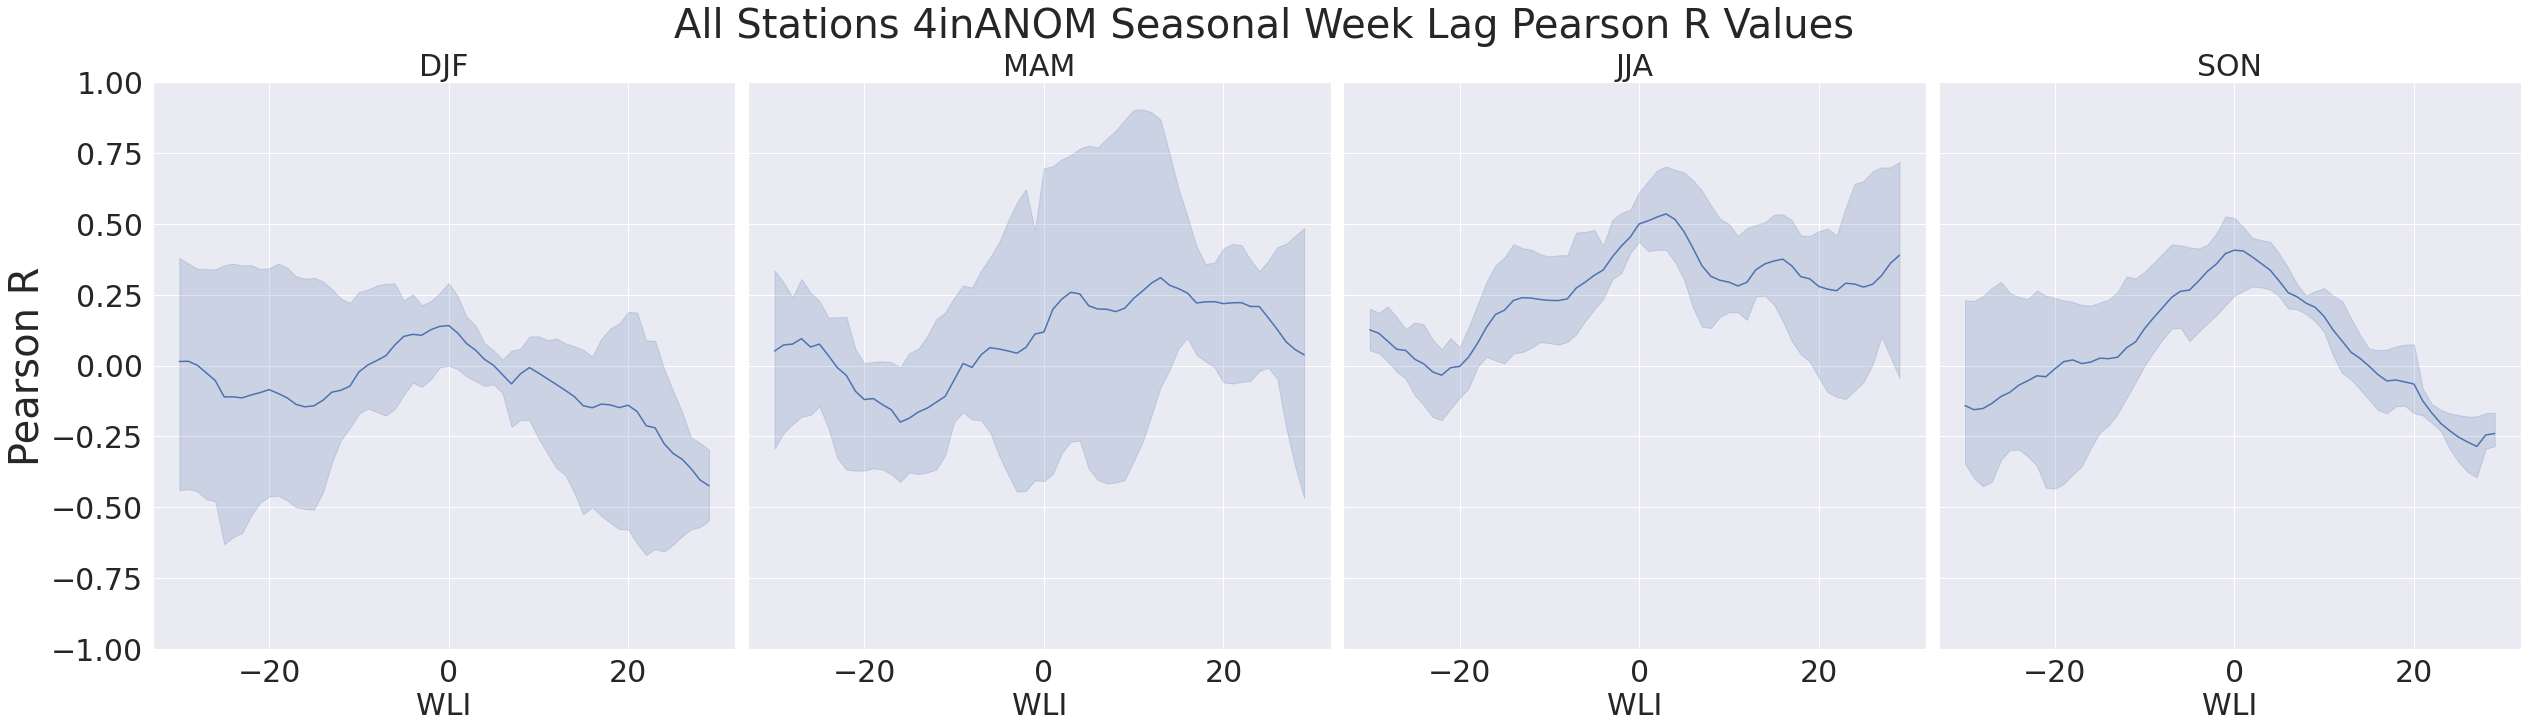

In [42]:
#plot station daylag correlations by season combined
fig, axes = plt.subplots(1,4, figsize=(35,10), constrained_layout=True, sharey=True)
axis = axes.flatten()

DJF = finalFrame[(finalFrame['months']==12)|(finalFrame['months']==1)|(finalFrame['months']==2)]
MAM = finalFrame[(finalFrame['months']==3)|(finalFrame['months']==4)|(finalFrame['months']==5)]
JJA = finalFrame[(finalFrame['months']==6)|(finalFrame['months']==7)|(finalFrame['months']==8)]
SON = finalFrame[(finalFrame['months']==9)|(finalFrame['months']==10)|(finalFrame['months']==11)]
g = sns.lineplot(x='Daylag', y='corr', data=stationframeDJF, ax=axis[0])
g2 = sns.lineplot(x='Daylag', y='corr', data=stationframeMAM, ax=axis[1])
g3 = sns.lineplot(x='Daylag', y='corr', data=stationframeJJA, ax=axis[2])
g4 = sns.lineplot(x='Daylag', y='corr', data=stationframeSON, ax=axis[3])
g.set_title('DJF', fontsize=30)
g2.set_title('MAM', fontsize=30)
g3.set_title('JJA', fontsize=30)
g4.set_title('SON', fontsize=30)
g.set_xlabel('WLI', fontsize=30)
g2.set_xlabel('WLI', fontsize=30)
g3.set_xlabel('WLI', fontsize=30)
g4.set_xlabel('WLI', fontsize=30)
axis[0].set(ylim=(-1.0, 1.0))
g.xaxis.set_tick_params(labelsize=30)
g2.xaxis.set_tick_params(labelsize=30)
g3.xaxis.set_tick_params(labelsize=30)
g4.xaxis.set_tick_params(labelsize=30)
fig.suptitle('All Stations 4inANOM Seasonal Week Lag Pearson R Values',fontsize=40)
g.set_ylabel('Pearson R', fontsize=40)
g.yaxis.set_tick_params(labelsize=30)

In [43]:
accuracyFrame=accuracyFrame.reset_index()


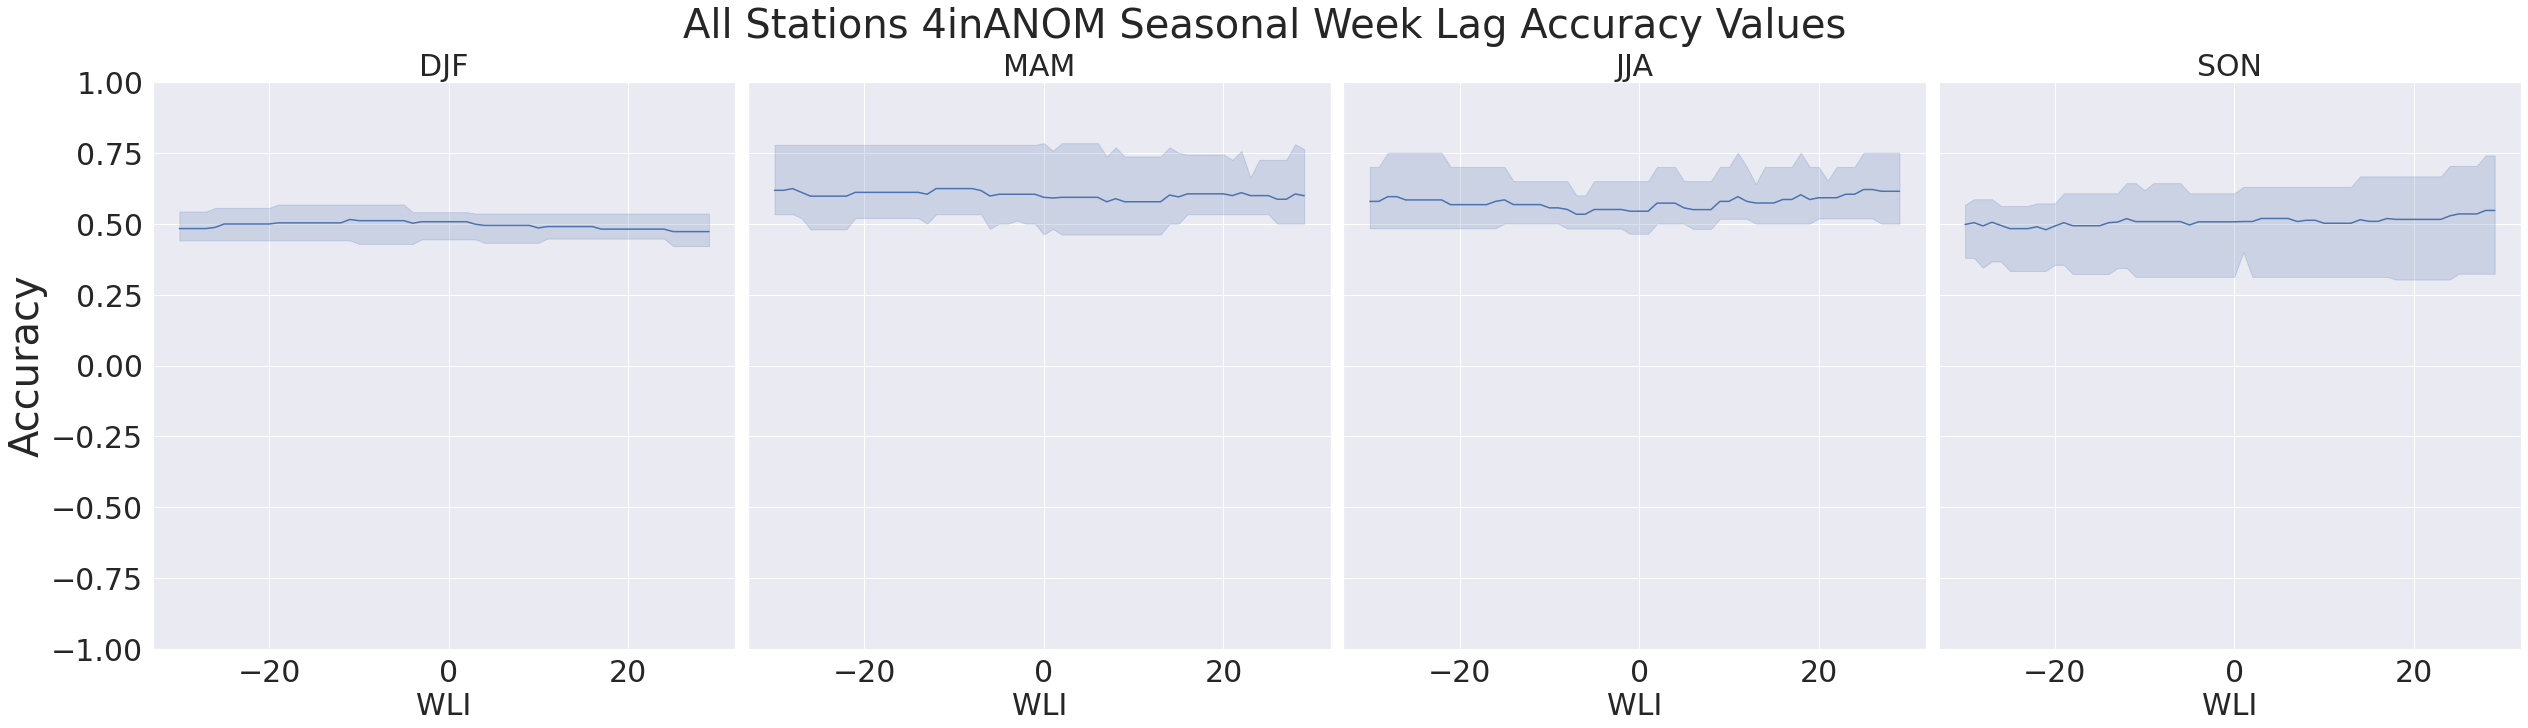

In [44]:
#plot station daylag correlations by season combined
fig, axes = plt.subplots(1,4, figsize=(35,10), constrained_layout=True, sharey=True)
axis = axes.flatten()

DJF = accuracyFrame[(accuracyFrame['months']==12)|(accuracyFrame['months']==1)|(accuracyFrame['months']==2)]
MAM = accuracyFrame[(accuracyFrame['months']==3)|(accuracyFrame['months']==4)|(accuracyFrame['months']==5)]
JJA = accuracyFrame[(accuracyFrame['months']==6)|(accuracyFrame['months']==7)|(accuracyFrame['months']==8)]
SON = accuracyFrame[(accuracyFrame['months']==9)|(accuracyFrame['months']==10)|(accuracyFrame['months']==11)]
stationframeDJF = DJF[DJF['station']==station]
stationframeMAM = MAM[MAM['station']==station]
stationframeJJA = JJA[JJA['station']==station]
stationframeSON = SON[SON['station']==station]
g = sns.lineplot(x='Daylag', y='4inAccuracy', data=stationframeDJF, ax=axis[0])
g2 = sns.lineplot(x='Daylag', y='4inAccuracy', data=stationframeMAM, ax=axis[1])
g3 = sns.lineplot(x='Daylag', y='4inAccuracy', data=stationframeJJA, ax=axis[2])
g4 = sns.lineplot(x='Daylag', y='4inAccuracy', data=stationframeSON, ax=axis[3])
g.set_title('DJF', fontsize=30)
g2.set_title('MAM', fontsize=30)
g3.set_title('JJA', fontsize=30)
g4.set_title('SON', fontsize=30)
g.set_xlabel('WLI', fontsize=30)
g2.set_xlabel('WLI', fontsize=30)
g3.set_xlabel('WLI', fontsize=30)
g4.set_xlabel('WLI', fontsize=30)
axis[0].set(ylim=(-1.0, 1.0))
g.xaxis.set_tick_params(labelsize=30)
g2.xaxis.set_tick_params(labelsize=30)
g3.xaxis.set_tick_params(labelsize=30)
g4.xaxis.set_tick_params(labelsize=30)
fig.suptitle('All Stations 4inANOM Seasonal Week Lag Accuracy Values',fontsize=40)
g.set_ylabel('Accuracy', fontsize=40)
g.yaxis.set_tick_params(labelsize=30)

Text(0.5, 0.98, '4inANOM Seasonal Daylag Correlations by Station and Month')

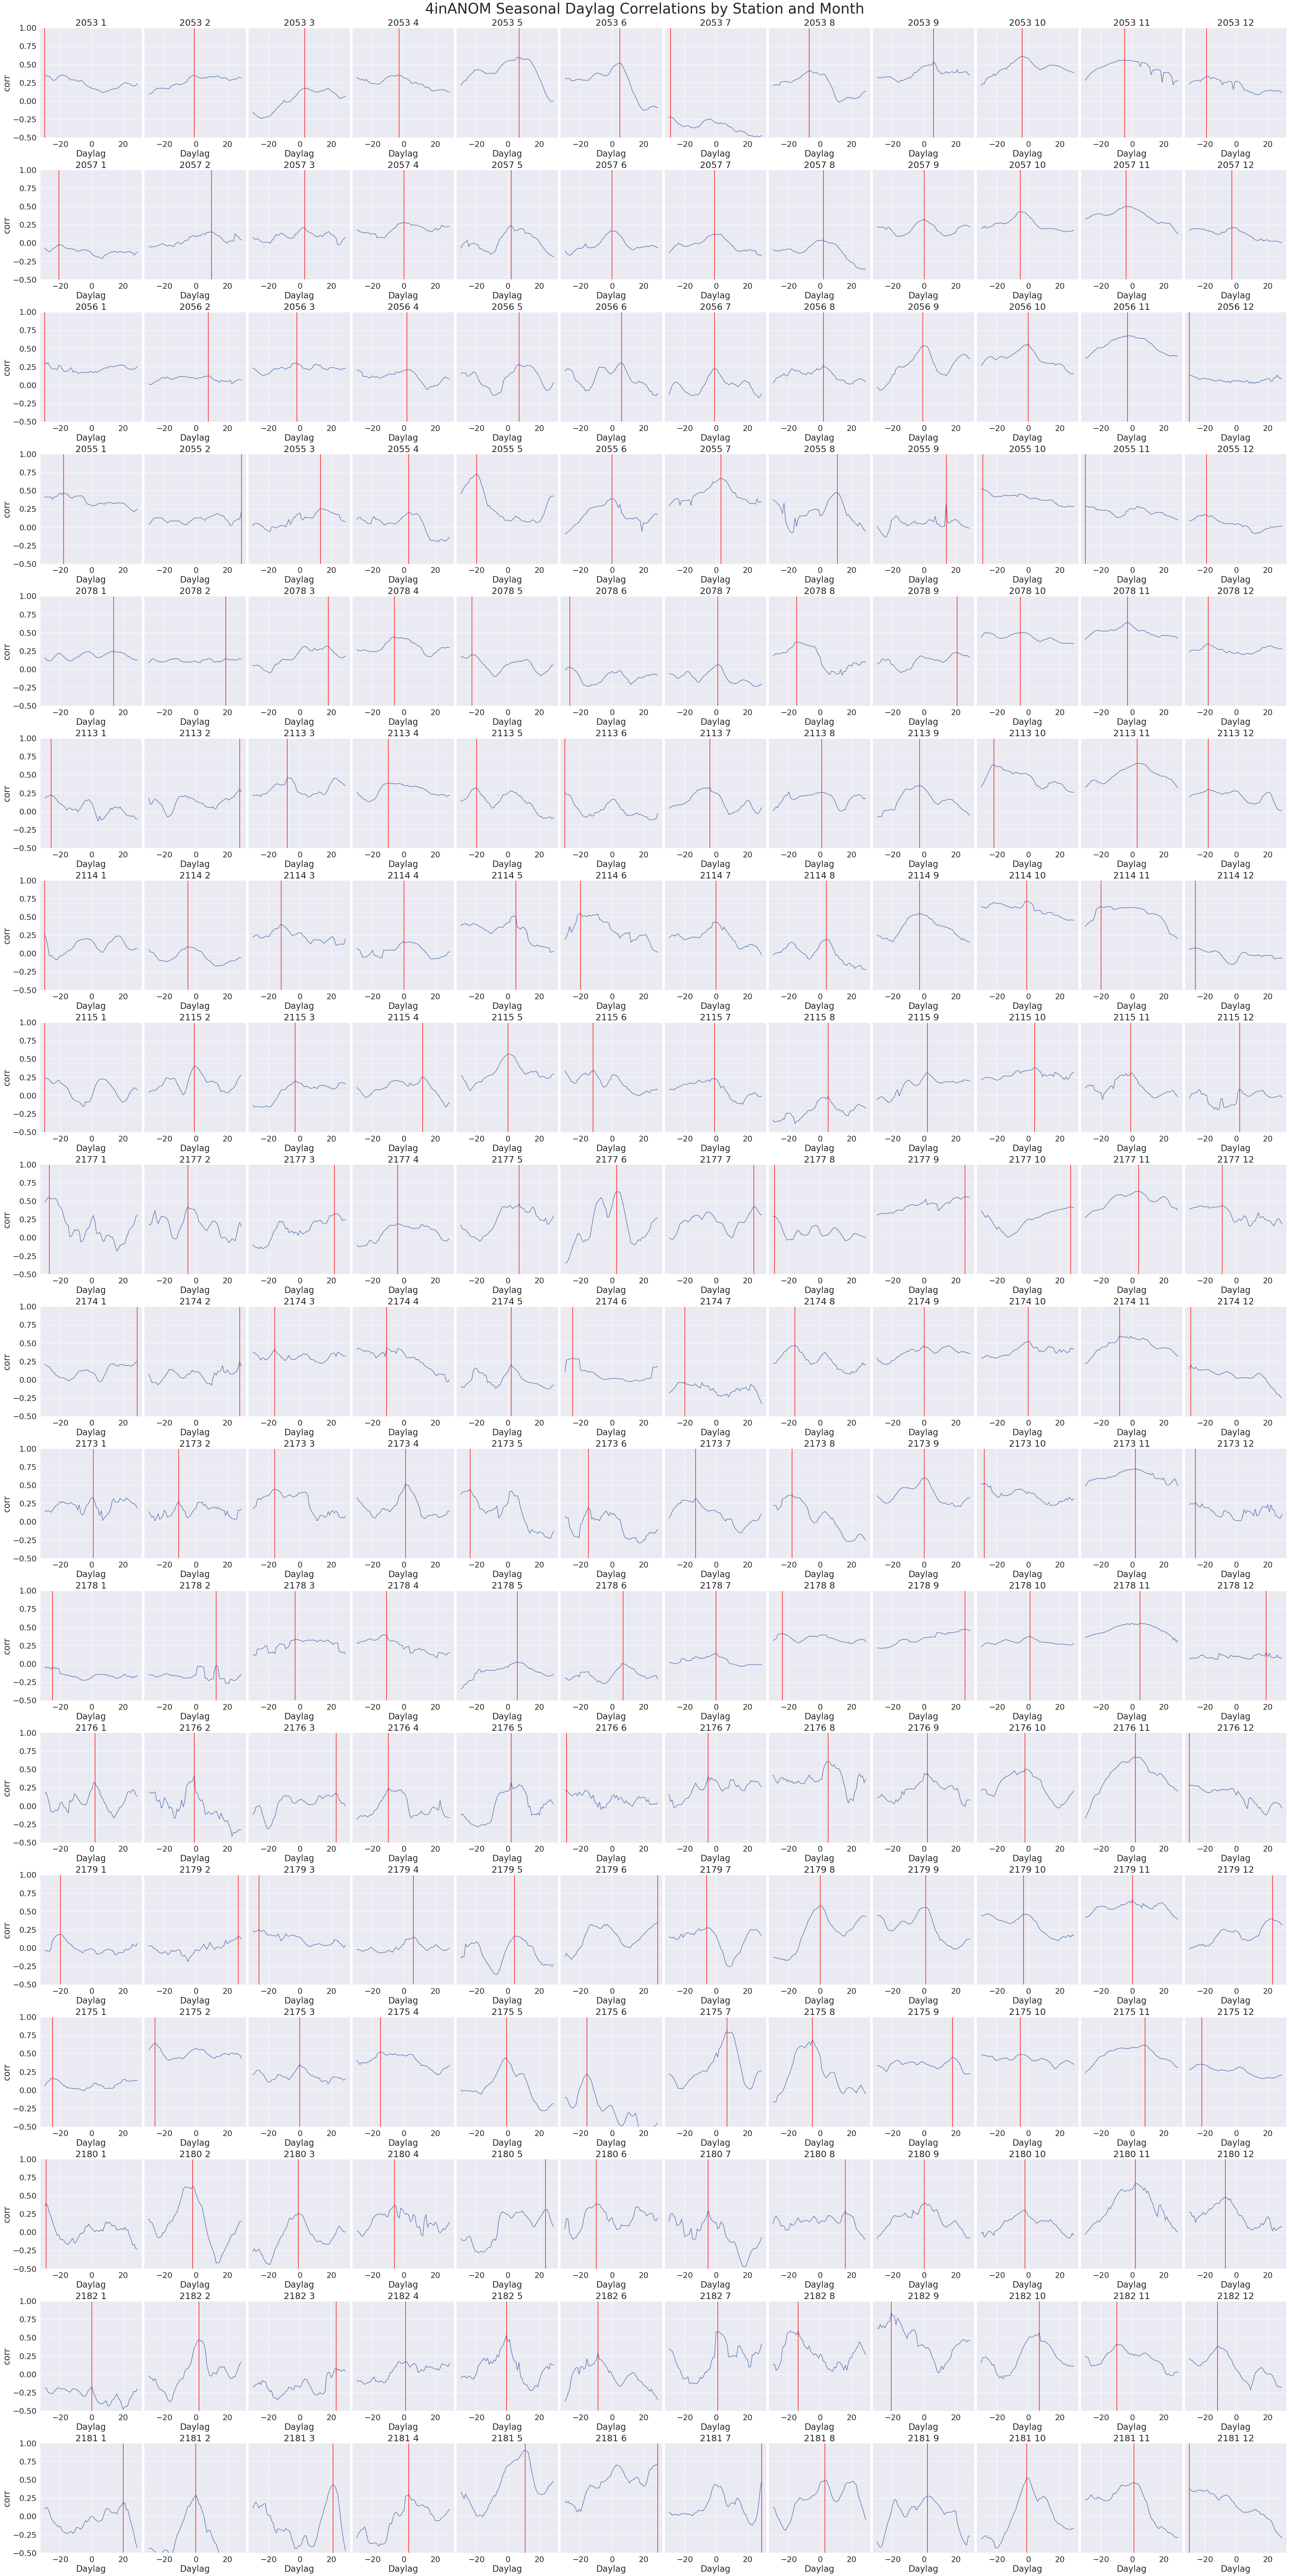

In [45]:
#plot station daylag correlations by season 
fig, axes = plt.subplots(18,12, figsize=(50, 100), constrained_layout=True, sharey=True)

for i, station in enumerate(finalFrame['station'].unique()):
    stationframeALL = finalFrame[finalFrame['station']==station]
    for j, m in enumerate(stationframeALL['months'].unique()):
        month_frame=stationframeALL[stationframeALL['months']==m]
        maxValue = month_frame['corr'].max()
        loc = month_frame[month_frame['corr']==maxValue]['Daylag']
        if month_frame.empty:
            pass
        else:
            if m==1:
                ax=axes[i,0]
            elif m==2:
                ax=axes[i,1]
            elif m==3:
                ax=axes[i,2]
            elif m==4:
                ax=axes[i,3]
            elif m==5:
                ax=axes[i,4]
            elif m==6:
                ax=axes[i,5]
            elif m==7:
                ax=axes[i,6]
            elif m==8:
                ax=axes[i,7]
            elif m==9:
                ax=axes[i,8]
            elif m==10:
                ax=axes[i,9]
            elif m==11:
                ax=axes[i,10]
            elif m==12:
                ax=axes[i,11]
            a = sns.lineplot(x='Daylag', y='corr', data=month_frame, ax=ax)
            a.set_title('{} {}'.format(station[0:4], m), fontsize=25)
           
            a.vlines(loc, -0.50, 1.0, colors='red', linestyles='solid')
            
        
    axes[i, 0].set(ylim=(-0.50, 1.0))
    
fig.suptitle('4inANOM Seasonal Daylag Correlations by Station and Month', fontsize=40)

In [46]:
month = []
daylag = []
mean = []
for m in finalFrame['months'].unique():
    month_frame=finalFrame[finalFrame['months']==m]
    for dl in month_frame['Daylag'].unique():
        dl_frame = month_frame[month_frame['Daylag']==dl]
        month.append(m)
        daylag.append(dl)
        mean.append(dl_frame['corr'].mean()) #give the average correlation for 18 stations at Daylag / month
axFrame = pd.DataFrame()
axFrame['Month'] = month
axFrame['Daylag']=daylag
axFrame['Mean']=mean

Text(0.5, 0.98, 'Average 4inANOM Daylag Correlations for All Stations at Each Month')

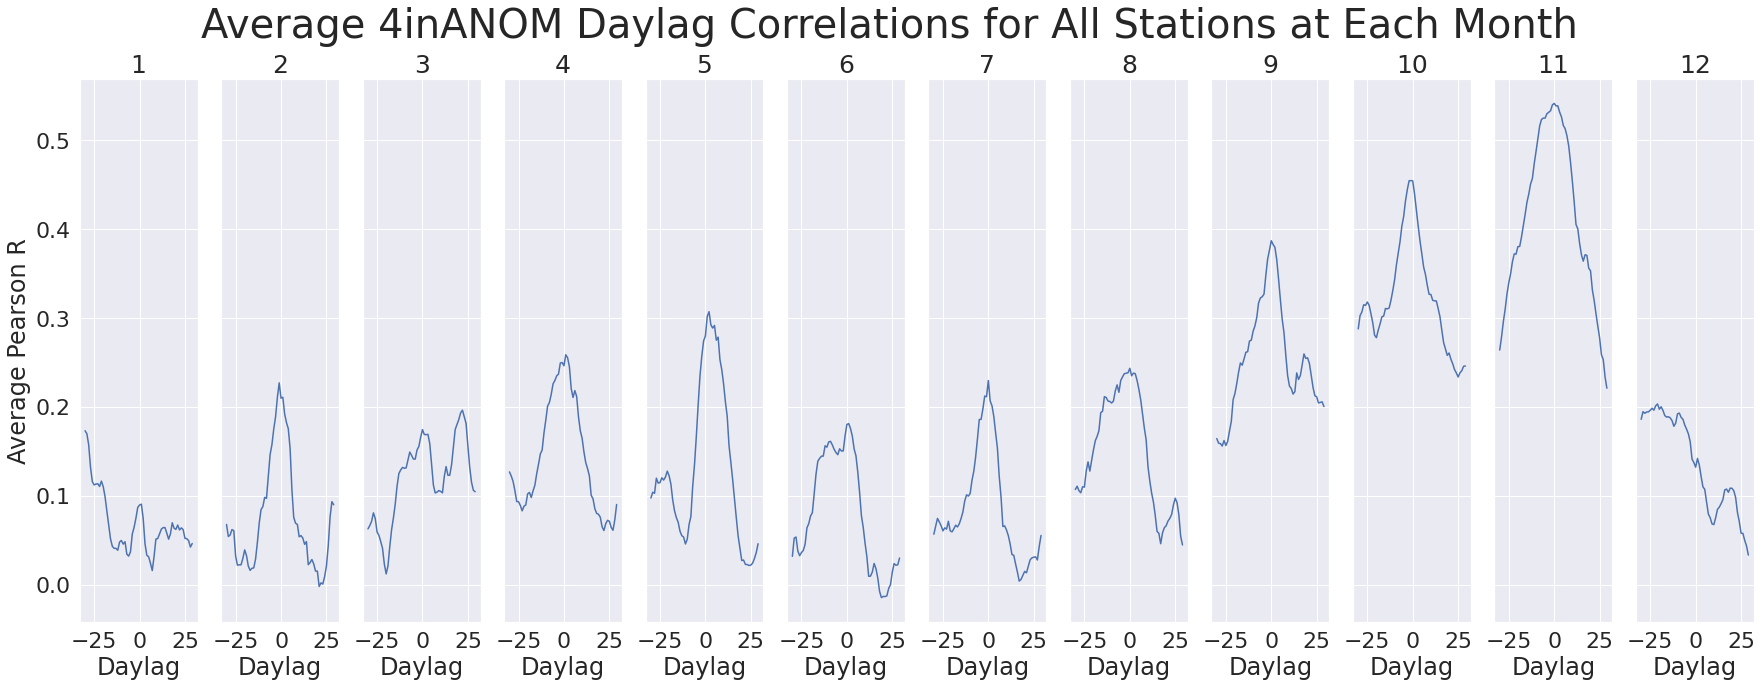

In [47]:
fig, ax = plt.subplots(1, 12, figsize=(30,10), sharey=True, sharex=True)
for m in axFrame['Month'].unique():
    monthFrame=axFrame[axFrame['Month']==m]
    a=sns.lineplot(x='Daylag', y='Mean', data=monthFrame, ax=ax[m-1])
    a.set_ylabel('Average Pearson R')
    a.set_title('{}'.format(m), fontsize=25)
    
fig.suptitle('Average 4inANOM Daylag Correlations for All Stations at Each Month', fontsize=40)

In [48]:
from datasets import SOILS_READ

In [49]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
two_counts = [] #list to store number of week observation for two_in correlations
four_counts = [] #list to store number of week observations for four_in correlations
eight_counts = [] #list to store number of week observation for eight_in correlations
twenty_counts = [] #list to store number of week observations for twenty_in correlations
forty_counts = [] #list to store number of week observations for forty_in correlations
two_corrs = [] #list to store the two_in corr
four_corrs = [] #list to store four_in corrfinalFrame
eight_corrs = [] #list to store eight_in corr
twenty_corrs = [] #list to store twenty_in corr
forty_corrs = [] #list to store fourty_in corr 
two_soils = [] #list to collect soil information
four_soils = [] 
eight_soils = []
twenty_soils = []
forty_soils = []

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            two_soils.append(monthframe['Two Soil Reclassified'].unique()[0])
            four_soils.append(monthframe['Four Soil Reclassified'].unique()[0])
            eight_soils.append(monthframe['Eight Soil Reclassified'].unique()[0])
            twenty_soils.append(monthframe['Twenty Soil Reclassified'].unique()[0])
            forty_soils.append(monthframe['Forty Soil Reclassified'].unique()[0])
            two_corrs.append(monthframe.corr()['ESI']['SMS-2.0in'])
            four_corrs.append(monthframe.corr()['ESI']['SMS-4.0in'])
            eight_corrs.append(monthframe.corr()['ESI']['SMS-8.0in'])
            twenty_corrs.append(monthframe.corr()['ESI']['SMS-20.0in'])
            forty_corrs.append(monthframe.corr()['ESI']['SMS-40.0in'])
            two_counts.append(monthframe.count()['SMS-2.0in'])
            four_counts.append(monthframe.count()['SMS-4.0in'])
            eight_counts.append(monthframe.count()['SMS-8.0in'])
            twenty_counts.append(monthframe.count()['SMS-20.0in'])
            forty_counts.append(monthframe.count()['SMS-40.0in'])
            
finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['months']=months #column for month
finalFrame['Two Corr']=two_corrs #colum for corrs 
finalFrame['Four Corr']=four_corrs 
finalFrame['Eight Corr']=eight_corrs 
finalFrame['Twenty Corr']=twenty_corrs
finalFrame['Forty Corr']=forty_corrs
finalFrame['Two Count']=two_counts #column for observations
finalFrame['Four Count']=four_counts
finalFrame['Eight Count']=eight_counts
finalFrame['Twenty Count']=twenty_counts
finalFrame['Forty Count']=forty_counts
finalFrame['Two Soil']=two_soils #column containing soil information
finalFrame['Four Soil']=four_soils
finalFrame['Eight Soil']=eight_soils 
finalFrame['Twenty Soil']=twenty_soils
finalFrame['Forty Soil']=forty_soils 

In [50]:
#get mean correlation by four in depth, soiltype and daylag day
daylags = []
meancorr = []
soil = []
for i in finalFrame['Four Soil'].unique():
    soilframe = finalFrame[finalFrame['Four Soil']==i]
    for j in soilframe['Daylag'].unique():
        soil.append(i)
        daylagframe = soilframe[soilframe['Daylag']==j]
        daylags.append(j)
        meancorr.append(daylagframe['Four Corr'].mean())

fourFrame = pd.DataFrame() #create empty dataframe
fourFrame['Daylag']=daylags #column for daylag
fourFrame['Soil']=soil #column to collect soil info
fourFrame['meancorr']=meancorr #mean corr from 4in

Text(0.5, 0, 'Week Lag Interval')

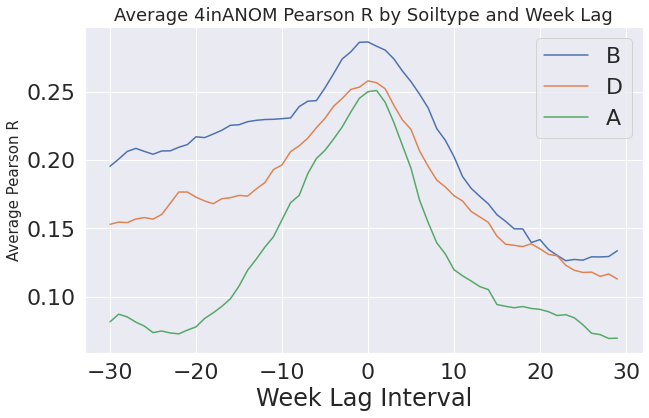

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
for s in fourFrame['Soil'].unique():
    soilframe = fourFrame[fourFrame['Soil']==s]
    ax.plot(soilframe['Daylag'], soilframe['meancorr'], label=s)
    ax.legend()
ax.set_title("Average 4inANOM Pearson R by Soiltype and Week Lag", fontsize=18)
ax.set_ylabel('Average Pearson R', fontsize=15)
ax.set_xlabel('Week Lag Interval')

In [53]:
daylags = []
meancorr = []
soil = []
depth = []
for i in ['A', 'B', 'C', 'D']:
    for j in ['Two Soil', 'Four Soil', 'Eight Soil', 'Twenty Soil', 'Forty Soil']:
        soilframe = finalFrame[finalFrame[j]==i]
        if soilframe.empty:
            pass
        else:
            for k in soilframe['Daylag'].unique():
                soil.append(i)
                daylagframe = soilframe[soilframe['Daylag']==k]
                daylags.append(k)
                columnName = j.split()
                columnName = columnName[0] + " Corr"
                meancorr.append(daylagframe[columnName].mean())
                depth.append(j)

soilsFrame = pd.DataFrame() #create empty dataframe
soilsFrame['Daylag']=daylags #column for daylag
soilsFrame['Soil']=soil #column to collect soil info
soilsFrame['meancorr']=meancorr #mean corr at depth
soilsFrame['depth']=depth

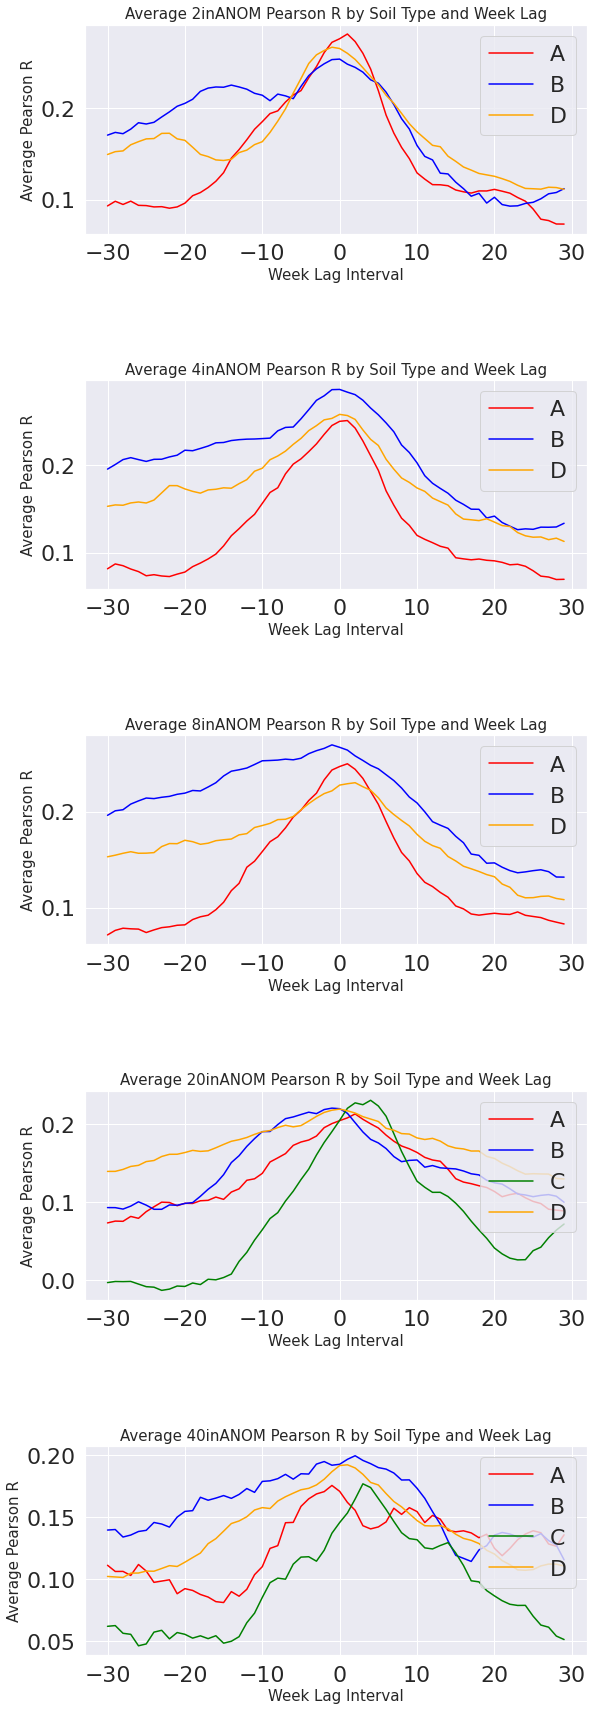

In [55]:
fig, ax = plt.subplots(5, 1, figsize=(9,30))
axs = ax.flatten()
fig.subplots_adjust(hspace=0.7)
count = -1
colordic = {"A":"red", "B":'blue', "C":"green", "D":"orange"}
ANOMdic = {'Two':'2inANOM', 'Four':'4inANOM', 'Eight':'8inANOM', 'Twenty':'20inANOM', 'Forty':'40inANOM'}
for i in soilsFrame.depth.unique():
    count+=1
    depthFrame = soilsFrame[soilsFrame['depth']==i]
    for j in depthFrame['Soil'].unique():
        groupFrame = depthFrame[depthFrame['Soil']==j]
        axs[count].plot(groupFrame['Daylag'], groupFrame['meancorr'], label=j, color=colordic.get(j))
        axs[count].legend(loc='upper right')
    axs[count].set_title('Average {} Pearson R by Soil Type and Week Lag'.format(ANOMdic.get(i.split()[0])), fontsize=15)
    axs[count].set_xlabel('Week Lag Interval', fontsize=15)
    axs[count].set_ylabel('Average Pearson R', fontsize=15)

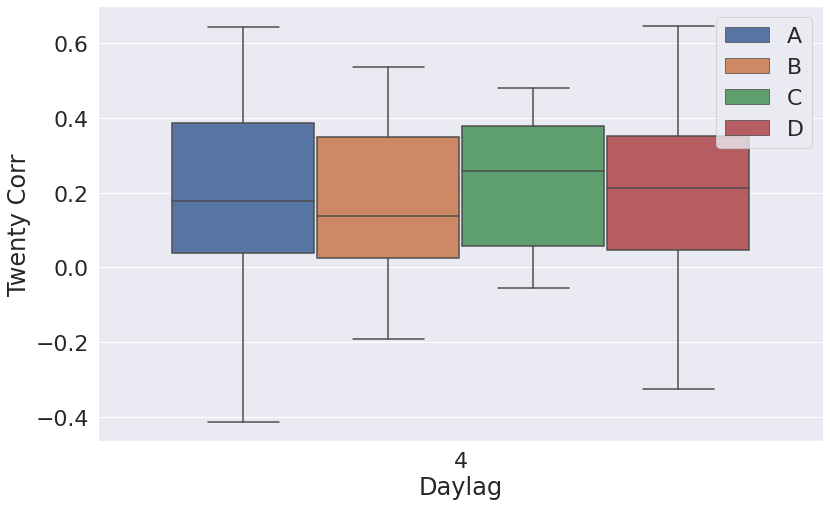

In [56]:
soils = finalFrame[finalFrame['Daylag']==4]
soils.sort_values('Twenty Corr', inplace=True)
fig, ax = plt.subplots(figsize=(13, 8))
g = sns.boxplot(data=soils, x='Daylag', y='Twenty Corr', hue='Twenty Soil', ax=ax, hue_order=['A', 'B', 'C', 'D'])
ax.legend(loc='upper right')

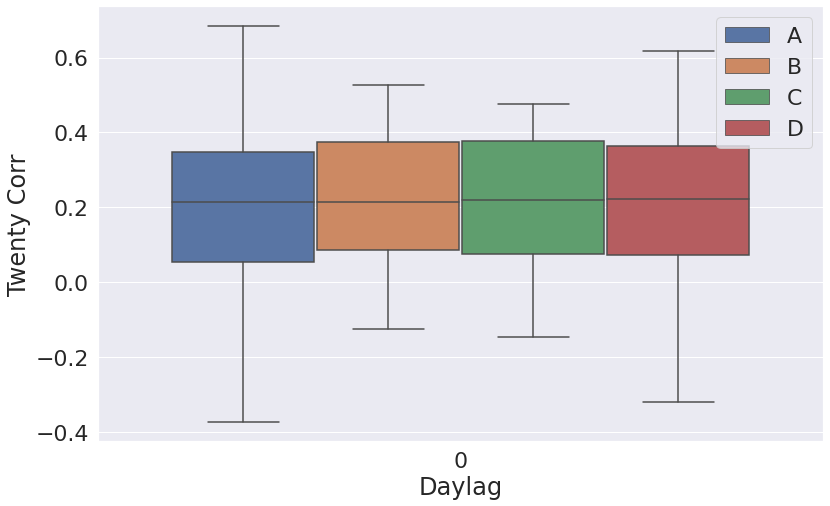

In [57]:
soils = finalFrame[finalFrame['Daylag']==0]
soils.sort_values('Twenty Corr', inplace=True)
fig, ax = plt.subplots(figsize=(13, 8))
g = sns.boxplot(data=soils, x='Daylag', y='Twenty Corr', hue='Twenty Soil', ax=ax, hue_order=['A', 'B', 'C', 'D'])
ax.legend(loc='upper right')

In [ ]:
soils = finalFrame[finalFrame['Daylag']==0]

In [ ]:
soils.sort_values(by=['station', 'months'], inplace=True)

In [ ]:
soils

In [ ]:
soilType = []
month = []
avgCorr = []
depth = []
ANOMdic = {'Two':'2inANOM', 'Four':'4inANOM', 'Eight':'8inANOM', 'Twenty':'20inANOM', 'Forty':'40inANOM'}
for i in ['Two Corr', 'Four Corr', 'Eight Corr','Twenty Corr', 'Forty Corr']:
    soilName = i.split()[0]+" Soil"
    columnFrame = soils[[i, 'months', soilName]]
    for s in columnFrame[soilName].unique():
        soilFrame = columnFrame[columnFrame[soilName]==s]
        for m in soilFrame['months'].unique():
            monthFrame=soilFrame[soilFrame['months']==m]
            avg = monthFrame[i].mean()
            avgCorr.append(avg)
            month.append(m)
            soilType.append(s)
            depth.append(ANOMdic.get(i.split()[0]))
avgFrame = pd.DataFrame()
avgFrame['SoilType']=soilType
avgFrame['month']=month
avgFrame['MeanCorr']=avgCorr
avgFrame['depth']=depth

#plot
palette ={"A":"red", "B":'blue', "C":"green", "D":"orange"}
fig, ax = plt.subplots(5, 1, figsize=(10, 45))
axes = ax.flatten()
fig.subplots_adjust(hspace=0.7)
count = 0
for i in avgFrame['depth'].unique():
    depthFrame = avgFrame[avgFrame['depth']==i]
    countSoils = len(depthFrame['SoilType'].unique())
    if countSoils == 3:
        g = sns.lineplot(x='month', y='MeanCorr', hue='SoilType', data=depthFrame, ax=axes[count], hue_order=['D', 'B', 'A'], palette=palette)
        axes[count].legend(loc='upper left', prop={'size': 15})
        axes[count].set_title('Average {} Pearson R by Soil Type and Month'.format(i), fontsize=19)
    else:
        g = sns.lineplot(x='month',y='MeanCorr', hue='SoilType', data=depthFrame, ax=axes[count], hue_order=['D', 'C', 'B', 'A'], palette=palette)
        axes[count].legend(loc='upper left', prop={'size': 15})
        g.set_title('Average {} Pearson R by Soil Type and Month'.format(i), fontsize=19)
    axes[count].set_ylim(-0.2, 0.7)
    axes[count].set_xlabel('Month', fontsize=19)
    axes[count].set_ylabel('Average Pearson R', fontsize=19)
    count+=1

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 45))
axs=ax.flatten()
fig.subplots_adjust(hspace=0.7)
count = 0
palette ={"A": "green", "B": "orange", "C": "red", "D": "blue"}
ANOMdic = {'Two':'2inANOM', 'Four':'4inANOM', 'Eight':'8inANOM', 'Twenty':'20inANOM', 'Forty':'40inANOM'}
for i in ['Two', 'Four', 'Eight', 'Twenty', 'Forty']:
    yname = i+ " Corr"
    hname = i+ " Soil"
    print(ANOMdic.get(i))
    if count < 3:
        g = sns.boxplot(x='months', y=yname, hue=hname, data=soils, ax=axs[count], hue_order=['D', 'B', 'A'], palette=palette)
        axs[count].legend(loc='upper left', prop={'size': 10})
        axs[count].set_title('Average {} Pearson R by Soil Type and Month'.format(ANOMdic.get(i)), fontsize=19)
    else: 
        g = sns.boxplot(x='months', y=yname, hue=hname, data=soils, ax=axs[count], hue_order=['D', 'C', 'B', 'A'], palette=palette)
        axs[count].legend(loc='upper left', prop={'size': 10})
        g.set_title('Average {} Pearson R by Soil Type and Month'.format(ANOMdic.get(i)), fontsize=19)
    count+=1

In [ ]:
from datasets import SOILS_READ
print(SOILS_READ)
SOILS_READ.set_index('depth', inplace=True)

In [ ]:
SOILS_READ = SOILS_READ.transpose()[['HSMS-2.0in', 'HSMS-4.0in', 'HSMS-8.0in', 'HSMS-20.0in', 'HSMS-40.0in']]

In [ ]:
melted = SOILS_READ.melt()
melted.dropna(inplace=True)

In [ ]:
from collections import Counter
x = Counter(melted['value'])

In [ ]:
x

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x.keys(), x.values())
ax.set_title('Soil Moisture Sensors by Hydrologic Soil Type')
ax.set_ylabel('Count', fontsize=19)
ax.set_xlabel('Soil Type', fontsize=19)

In [67]:
zeroacc = accuracyFrame[accuracyFrame['Daylag']==0]

In [68]:
zerosoil = soilframe[soilframe['Daylag']==0]

In [69]:
zeroacc.merge(zerosoil, on=['station', 'months'])

Daylag_x       station  months  2inAccuracy  4inAccuracy  8inAccuracy  \
0           0  2053:AL:SCAN       2     0.396825     0.412698     0.380952   
1           0  2053:AL:SCAN       3     0.447761     0.477612     0.447761   
2           0  2053:AL:SCAN       4     0.465116     0.488372     0.500000   
3           0  2053:AL:SCAN       5     0.516667     0.533333     0.516667   
4           0  2053:AL:SCAN       6     0.636364     0.522727     0.636364   
..        ...           ...     ...          ...          ...          ...   
127         0  2175:AL:SCAN      11     0.567568     0.459459     0.432432   
128         0  2175:AL:SCAN      12     0.514286     0.485714     0.485714   
129         0  2175:AL:SCAN       1     0.575000     0.550000     0.525000   
130         0  2175:AL:SCAN       2     0.500000     0.464286     0.571429   
131         0  2175:AL:SCAN       3     0.500000     0.500000     0.416667   

     20inAccuracy  40inAccuracy  Daylag_y  Two Corr  ...  Two Count  \
0        0.444444      0.412698         0  0.253040  ...         63   
1        0.417910      0.447761         0  0.143324  ...         67   
2        0.465116      0.500000         0  0.226412  ...         86   
3        0.566667      0.550000         0  0.344097  ...         60   
4        0.522727      0.659091         0  0.250047  ...         44   
..            ...           ...       ...       ...  ...        ...   
127      0.459459      0.459459         0  0.084572  ...         27   
128      0.485714      0.657143         0  0.215911  ...         26   
129      0.550000      0.575000         0  0.024646  ...         37   
130      0.464286      0.714286         0  0.421467  ...         25   
131      0.500000      0.458333         0  0.352446  ...         22   

     Four Count  Eight Count  Twenty Count  Forty Count  Two Soil  Four Soil  \
0            60           60            60           54         D          B   
1            63           63            63           57         D          B   
2            82           83            78           71         D          B   
3            55           60            51           50         D          B   
4            37           44            37           39         D          B   
..          ...          ...           ...          ...       ...        ...   
127          37           36            37           19         B          B   
128          35           31            35           17         B          B   
129          40           35            40           23         B          B   
130          28           25            28           17         B          B   
131          24           20            24           15         B          B   

     Eight Soil  Twenty Soil Forty Soil  
0             B            D          D  
1             B            D          D  
2             B            D          D  
3             B            D          D  
4             B            D          D  
..          ...          ...        ...  
127           B            B          D  
128           B            B          D  
129           B            B          D  
130           B            B          D  
131           B            B          D  

[132 rows x 24 columns]

In [70]:
zeroacc

Daylag       station  months  2inAccuracy  4inAccuracy  8inAccuracy  \
6480       0  2053:AL:SCAN       2     0.396825     0.412698     0.380952   
6481       0  2053:AL:SCAN       3     0.447761     0.477612     0.447761   
6482       0  2053:AL:SCAN       4     0.465116     0.488372     0.500000   
6483       0  2053:AL:SCAN       5     0.516667     0.533333     0.516667   
6484       0  2053:AL:SCAN       6     0.636364     0.522727     0.636364   
...      ...           ...     ...          ...          ...          ...   
6691       0  2181:AL:SCAN       3     0.700000     0.533333     0.600000   
6692       0  2181:AL:SCAN       6     0.650000     0.650000     0.450000   
6693       0  2181:AL:SCAN       9     0.464286     0.607143     0.392857   
6694       0  2181:AL:SCAN      10     0.533333     0.600000     0.433333   
6695       0  2181:AL:SCAN      11     0.562500     0.312500     0.625000   

      20inAccuracy  40inAccuracy  
6480      0.444444      0.412698  
6481      0.417910      0.447761  
6482      0.465116      0.500000  
6483      0.566667      0.550000  
6484      0.522727      0.659091  
...            ...           ...  
6691      0.633333      0.633333  
6692      0.650000      0.550000  
6693      0.464286      0.392857  
6694      0.566667      0.433333  
6695      0.625000      0.500000  

[216 rows x 8 columns]

In [76]:
soilframe.columns

Index(['Daylag', 'station', 'months', 'Two Corr', 'Four Corr', 'Eight Corr',
       'Twenty Corr', 'Forty Corr', 'Two Count', 'Four Count', 'Eight Count',
       'Twenty Count', 'Forty Count', 'Two Soil', 'Four Soil', 'Eight Soil',
       'Twenty Soil', 'Forty Soil'],
      dtype='object')

In [91]:
soils = SOILS_READ.set_index('depth')

In [106]:
soilget = {'Two Soil':'HSMS-2.0in', 'Four Soil':'HSMS-4.0in', 'Eight Soil':'HSMS-8.0in', 
           'Twenty Soil':'HSMS-20.0in', 'Forty Soil':'HSMS-40.0in'}
store = {}
count=0
for i in zeroacc['station'].unique():
    accFrame = zeroacc[zeroacc['station']==i]
    two_soil = soils[soils.index == soilget.get('Two Soil')][i].item()
    four_soil = soils[soils.index == soilget.get('Four Soil')][i].item()
    eight_soil = soils[soils.index == soilget.get('Eight Soil')][i].item()
    twenty_soil = soils[soils.index == soilget.get('Twenty Soil')][i].item()
    forty_soil = soils[soils.index == soilget.get('Forty Soil')][i].item()
    accFrame['HSMS-2.0in']=two_soil
    accFrame['HSMS-4.0in']=four_soil
    accFrame['HSMS-8.0in']=eight_soil
    accFrame['HSMS-20.0in']=twenty_soil
    accFrame['HSMS-40.0in']=forty_soil
    store[count]=accFrame
    count+=1

In [126]:
accFrame = pd.concat(store, ignore_index=True)
depth = []
acc = []
month = []
soil = []

hue_colors = {'A':'red', 'B':'blue', 'C':'green', 'D':'yellow'}
depths = {'HSMS-2.0in':'2inAccuracy','HSMS-4.0in':'4inAccuracy', 'HSMS-8.0in':'8inAccuracy', 'HSMS-20.0in':'20inAccuracy', 'HSMS-40.0in':'40inAccuracy'}
for i in ['HSMS-2.0in','HSMS-4.0in', 'HSMS-8.0in', 'HSMS-20.0in', 'HSMS-40.0in']:
    for j in accFrame[i].unique():
        soilFrame = accFrame[accFrame[i]==j]
        for m in soilFrame['months'].unique():
            monthFrame=soilFrame[soilFrame['months']==m]
            avg_acc = monthFrame[depths.get(i)].mean()
            acc.append(avg_acc)
            depth.append(i)
            month.append(m)
            soil.append(j)

In [128]:
soilAcc = pd.DataFrame()
soilAcc['depth']=depth
soilAcc['month']=month
soilAcc['soilType']=soil
soilAcc['AvgAcc']=acc

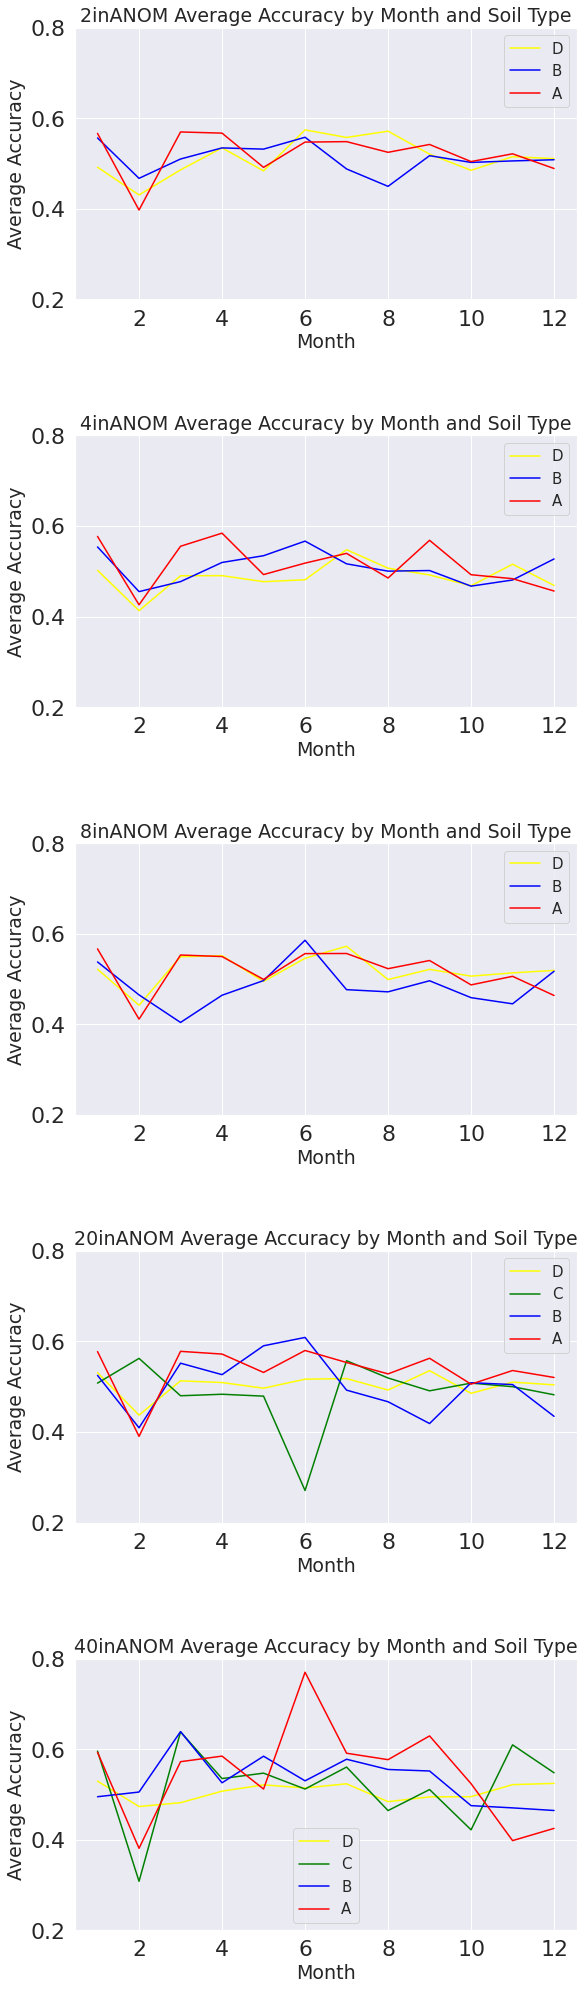

In [164]:
fig, ax = plt.subplots(figsize=(9,35), nrows=5, ncols=1)
axes=ax.flatten()
count = 0
soils = {'HSMS-2.0in':'2inANOM', 'HSMS-4.0in':'4inANOM', 'HSMS-8.0in':'8inANOM', 'HSMS-20.0in':'20inANOM', 'HSMS-40.0in':'40inANOM'}
for i in soilAcc['depth'].unique():
    depthFrame = soilAcc[soilAcc['depth']==i]
    if count <= 2:
        sns.lineplot(x='month', y='AvgAcc', hue='soilType', data=depthFrame, ax=axes[count], palette=hue_colors, hue_order=['D', 'B', 'A'])
        axes[count].legend(prop={'size': 15})
        axes[count].set_ylabel('Average Accuracy', fontsize=19)
        axes[count].set_xlabel('Month', fontsize=19)
        axes[count].set_title('{} Average Accuracy by Month and Soil Type'.format(soils.get(i)), fontsize=19)
        axes[count].set_ylim(0.2, 0.8)
    else: 
        sns.lineplot(x='month', y='AvgAcc', hue='soilType', data=depthFrame, ax=axes[count], palette=hue_colors, hue_order=['D', 'C', 'B', 'A'])
        axes[count].legend(prop={'size': 15})
        axes[count].set_ylabel('Average Accuracy', fontsize=19)
        axes[count].set_xlabel('Month', fontsize=19)
        axes[count].set_title('{} Average Accuracy by Month and Soil Type'.format(soils.get(i)), fontsize=19)
        axes[count].set_ylim(0.2, 0.8)
    count+=1

fig.subplots_adjust(hspace=0.5)